In [68]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#데이터 불러오기

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler

In [70]:
weather_df_jeju = pd.read_csv("/content/drive/MyDrive/weather_df_제주.csv")
weather_df_gosan = pd.read_csv("/content/drive/MyDrive/weather_df_고산.csv")
weather_df_seongsan = pd.read_csv("/content/drive/MyDrive/weather_df_성산.csv")
weather_df_seo = pd.read_csv("/content/drive/MyDrive/weather_df_서귀포.csv")
electricity_demand = pd.read_csv("/content/전력 수요량 시간별 데이터_new.csv")

In [71]:
electricity_demand

,date,hour,area,electricity demand(MWh)
0,2021-01-01,1,제주도,746329
1,2021-01-01,2,제주도,710544
2,2021-01-01,3,제주도,685313
3,2021-01-01,4,제주도,674663
4,2021-01-01,5,제주도,673656
...,...,...,...,...
17515,2022-12-31,20,제주도,926980
17516,2022-12-31,21,제주도,921498
17517,2022-12-31,22,제주도,903747
17518,2022-12-31,23,제주도,882189


In [72]:
merged_df_jeju = weather_df_jeju.merge(electricity_demand[['date', 'hour', 'electricity demand(MWh)']], on=['date', 'hour'], how='left')
# date 열을 datetime 형식으로 변환합니다.
merged_df_jeju['date'] = pd.to_datetime(merged_df_jeju['date'])

# 날짜 열을 기반으로 요일을 추출하여 새로운 열에 추가합니다.
merged_df_jeju['weekday'] = merged_df_jeju['date'].dt.dayofweek

# 요일(one-hot encoding) 추가
merged_df_jeju = pd.get_dummies(merged_df_jeju, columns=['weekday'])

merged_df_jeju

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature,Q12,Q13,Q_mean,electricity demand(MWh),weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2021-01-01,1,320.0,6.1,9.0,0.0,53.0,4.5,0.0,0.0,0.0,746329,0,0,0,0,1,0,0
1,2021-01-01,2,320.0,5.6,9.0,0.0,58.0,4.3,0.0,0.0,0.0,710544,0,0,0,0,1,0,0
2,2021-01-01,3,320.0,5.5,10.0,0.0,54.0,4.2,0.0,0.0,0.0,685313,0,0,0,0,1,0,0
3,2021-01-01,4,320.0,5.4,10.0,0.0,52.0,4.3,0.0,0.0,0.0,674663,0,0,0,0,1,0,0
4,2021-01-01,5,290.0,4.2,10.0,0.0,47.0,4.2,0.0,0.0,0.0,673656,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31,20,320.0,3.4,6.0,0.0,60.0,6.9,0.0,0.0,0.0,926980,0,0,0,0,0,1,0
17516,2022-12-31,21,290.0,2.9,7.0,0.0,59.0,6.8,0.0,0.0,0.0,921498,0,0,0,0,0,1,0
17517,2022-12-31,22,320.0,3.2,6.0,0.0,61.0,6.8,0.0,0.0,0.0,903747,0,0,0,0,0,1,0
17518,2022-12-31,23,250.0,1.9,3.0,0.0,62.0,6.0,0.0,0.0,0.0,882189,0,0,0,0,0,1,0


In [73]:
merged_df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 0 to 17519
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     17520 non-null  datetime64[ns]
 1   hour                     17520 non-null  int64         
 2   WindDirection            17518 non-null  float64       
 3   WindSpeed                17518 non-null  float64       
 4   Cloud                    17502 non-null  float64       
 5   Rainfall                 17520 non-null  float64       
 6   Humidity                 17520 non-null  float64       
 7   Temperature              17520 non-null  float64       
 8   Q12                      17520 non-null  float64       
 9   Q13                      17520 non-null  float64       
 10  Q_mean                   17520 non-null  float64       
 11  electricity demand(MWh)  17520 non-null  int64         
 12  weekday_0                17520 n

In [74]:
merged_df_jeju = merged_df_jeju.dropna()

<ipython-input-75-a4742e4d20a3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df_jeju.corr(), annot=True, cmap=cmap)


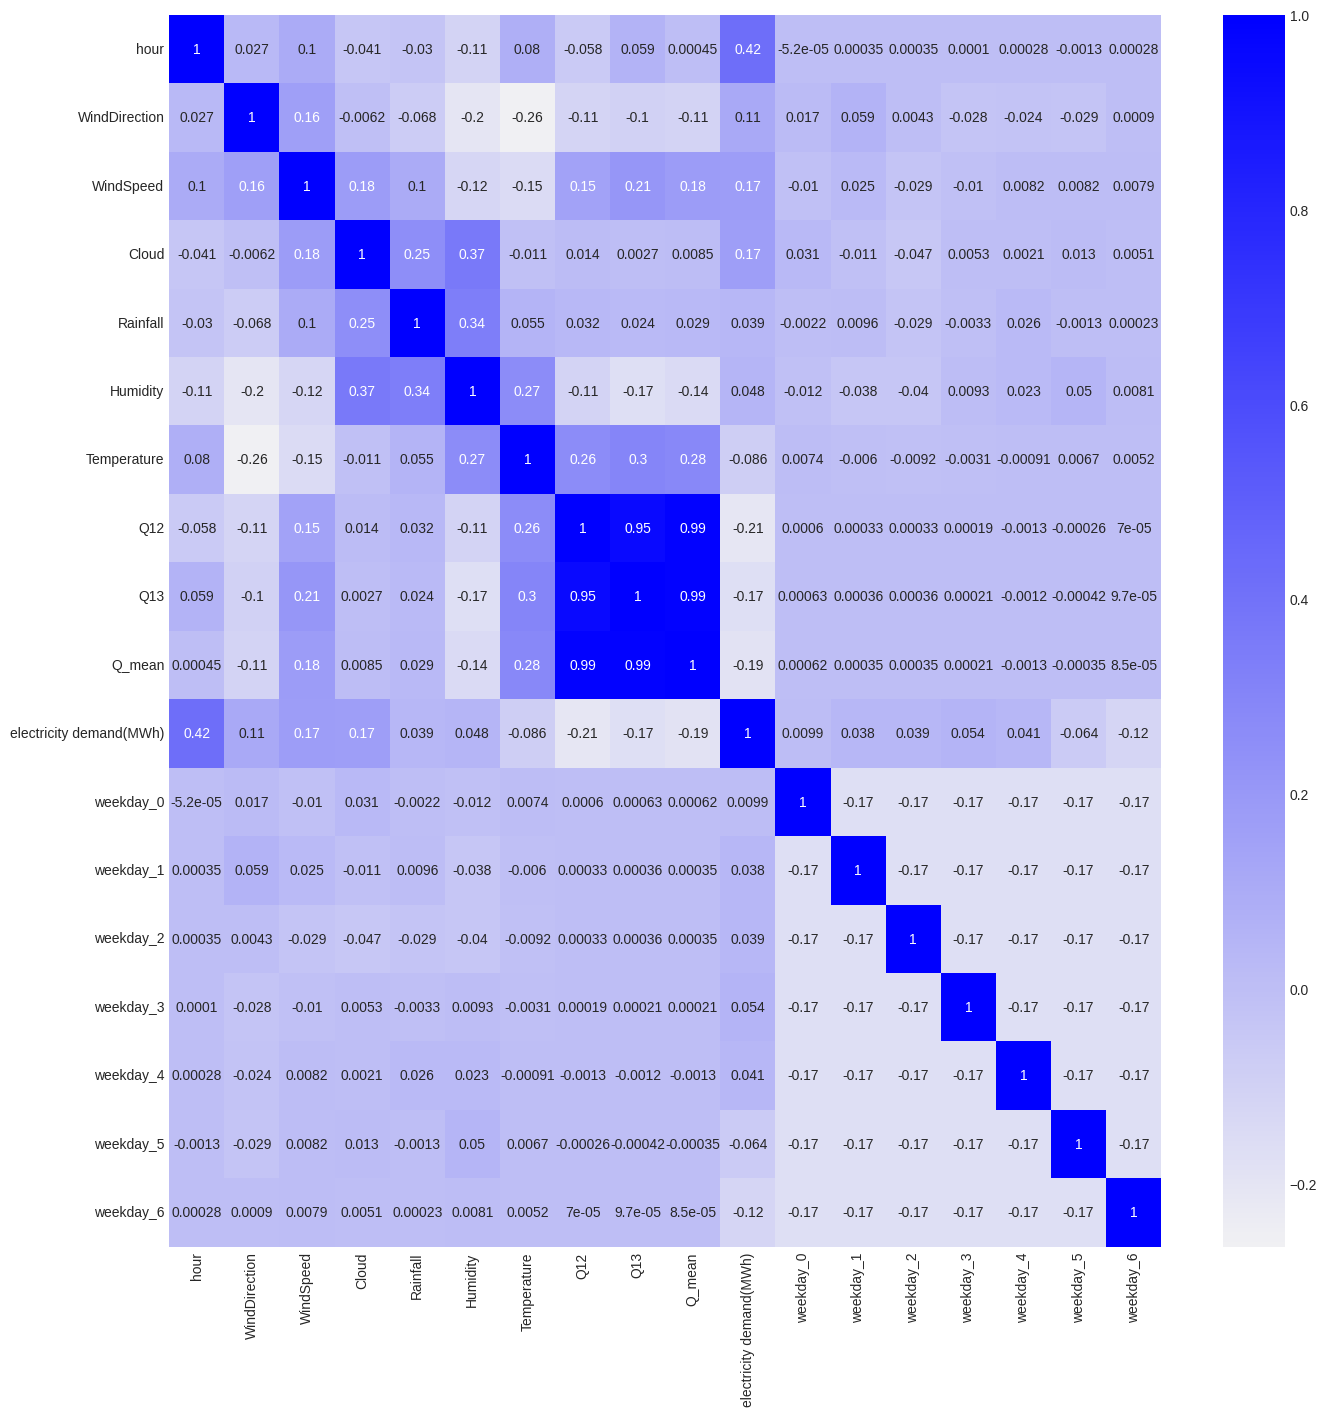

In [75]:
plt.figure(figsize=(16, 16))
cmap = sns.light_palette(color="b", as_cmap=True)
sns.heatmap(merged_df_jeju.corr(), annot=True, cmap=cmap)
plt.show()

#모델링

In [76]:
import os
from tqdm import tqdm
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts


In [77]:
ss = StandardScaler()

columns_to_scale = ['WindDirection', 'WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature', 'Q12', 'Q13', 'Q_mean', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
merged_df_jeju[columns_to_scale] = ss.fit_transform(merged_df_jeju[columns_to_scale])

<ipython-input-77-7956489c30c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju[columns_to_scale] = ss.fit_transform(merged_df_jeju[columns_to_scale])


In [78]:
features = merged_df_jeju.drop(['date', 'WindDirection', 'WindSpeed', 'Q12', 'Q_mean', 'electricity demand(MWh)'], axis=1)
labels = merged_df_jeju['electricity demand(MWh)']

In [79]:
class ElecDemandDataset(Dataset):
    def __init__(self, features, labels, window_size=2, step_size=1):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)
        self.window_size = window_size
        self.step_size = step_size

    def __len__(self):
        total_steps = len(self.features) - self.window_size + 1
        # Calculate the number of complete windows that can be formed
        if total_steps > 0:
            return (total_steps + self.step_size - 1) // self.step_size
        else:
            return 0

    def __getitem__(self, index):
        start = index * self.step_size
        end = start + self.window_size

        return (self.features[start:end], self.labels[start:end])

In [80]:
col_name = list(features.columns)
col_name

['hour',
 'Cloud',
 'Rainfall',
 'Humidity',
 'Temperature',
 'Q13',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [81]:
features_train, features_val, labels_train, labels_val = train_test_split(features, labels, test_size=0.2, random_state=42)

In [82]:
train_dataset = ElecDemandDataset(features_train, labels_train)
val_dataset = ElecDemandDataset(features_val, labels_val)

In [83]:
len(train_dataset), len(val_dataset)

(13999, 3499)

In [84]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [85]:
print(train_dataset[0])
print(train_dataset[0][0].shape)
print(train_dataset[0][1].shape)

(tensor([[13.0000, -0.3237, -0.2436, -2.0510, -1.0677,  0.9748, -0.4075, -0.4077,
         -0.4077, -0.4078, -0.4102,  2.4444, -0.4079],
        [13.0000, -0.0418, -0.2436, -0.5402, -0.2051,  1.1973, -0.4075, -0.4077,
         -0.4077,  2.4524, -0.4102, -0.4091, -0.4079]]), tensor([503508., 568131.]))
torch.Size([2, 13])
torch.Size([2])


In [86]:
train_features, train_labels = next(iter(train_loader))
print(train_features.shape)
print(train_labels.shape)

torch.Size([64, 2, 13])
torch.Size([64, 2])


#Train

In [87]:
!pip install transformers

In [88]:
import torch
import torch.nn as nn

try:
    from transformers.modeling_bert import BertConfig, BertEncoder, BertModel
except:
    from transformers.models.bert.modeling_bert import BertConfig, BertEncoder, BertModel

In [89]:
class LSTMwithAttn(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, num_heads=8, dropout=0.1, device='cpu'):
        super(LSTMwithAttn, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.output_dim = output_dim
        self.dropout = dropout
        self.device = device

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        self.config = BertConfig(
            hidden_size=hidden_dim,
            num_hidden_layers=num_layers,
            num_attention_heads=num_heads,
            intermediate_size=hidden_dim,
            hidden_dropout_prob=dropout,
            attention_probs_dropout_prob=dropout,
        )
        self.encoder = BertEncoder(self.config)

        self.act = nn.SiLU()
        self.fc = nn.Linear(hidden_dim, output_dim)

        self.init_weights()


    def init_hidden_state(self, batch_size):
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(self.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(self.device)
        return (h0, c0)


    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)


    def generate_attn_mask(self, x):
        seq_len = x.size(1)
        attn_mask = torch.tril(torch.ones((seq_len, seq_len))).view(1, seq_len, seq_len).to(self.device)

        return attn_mask


    def forward(self, x):
        batch_size = x.size(0)

        h0, c0 = self.init_hidden_state(batch_size)

        output, (hidden, cell) = self.lstm(x, (h0, c0))

        output = output.contiguous().view(batch_size, -1, self.hidden_dim)

        # Attention Mask
        attn_mask = self.generate_attn_mask(x)
        extended_attn_mask = attn_mask[None, :, :, :].expand(batch_size, -1, -1, -1)
        extended_attn_mask = (1.0 - extended_attn_mask) * -10000.0

        encoder_outputs = self.encoder(output, attention_mask=extended_attn_mask)

        output = self.act(encoder_outputs.last_hidden_state)
        output = self.fc(output)

        return output

In [90]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [91]:
model = LSTMwithAttn(input_dim=13, hidden_dim=64, output_dim=1, num_layers=2, device=device)

In [92]:
model = model.to(device)

In [93]:
LEARNING_RATE = 0.01
EPOCHS = 100
WEIGHT_DECAY = 0.01
EARLY_STOPPING = 5

In [94]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.001)

In [95]:
criterion = nn.MSELoss(reduction='mean')

In [96]:
train_losses = []
val_losses = []

loss = .0
best_val_loss = float('inf')
increasing_loss_count = 0

In [97]:
model.eval()

with torch.no_grad():
    for features, labels in val_loader:
        features = features.to(device)
        labels = labels.to(device)

        outputs = model(features)

        _loss = criterion(outputs.squeeze(-1), labels)

        loss += _loss.item()

print(f'Initial Loss: {loss/len(val_loader):.4f}')

Initial Loss: 492633136705.1636


In [98]:
train_losses = []
val_losses = []

for i in range(EPOCHS):
    print("=" * 30)
    print(f"Current Epoch {i+1}")
    print("=" * 30)
    print("Training...")
    train_loss = .0

    model.train()
    for features, labels in tqdm(train_loader, leave=False):
        features = features.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(features)

        _loss = criterion(outputs.squeeze(-1), labels)
        _loss.backward()
        optimizer.step()

        train_loss += _loss.item()


    print("Evaluating...")
    val_loss = .0

    model.eval()

    for features, labels in tqdm(val_loader, leave=False):
        features = features.to(device)
        labels = labels.to(device)

        outputs = model(features)

        _loss = criterion(outputs.squeeze(-1), labels)

        val_loss += _loss.item()

    train_losses += [train_loss/len(train_loader)]
    epoch_val_loss = val_loss/len(val_loader)
    val_losses += [epoch_val_loss]
    print(f"Epoch #{i+1}: [Training MSE/Validation MSE]: [{train_loss/len(train_loader):.4f}/{val_loss/len(val_loader):.4f}]")

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        increasing_loss_count = 0
    else:
        increasing_loss_count += 1

    if increasing_loss_count >= EARLY_STOPPING:
        print("Early Stopping!")
        break

Current Epoch 1
Training...


Evaluating...


Epoch #1: [Training MSE/Validation MSE]: [490046605433.5708/491682841469.6727]
Current Epoch 2
Training...


Evaluating...


Epoch #2: [Training MSE/Validation MSE]: [488102896551.1598/488706475175.5637]
Current Epoch 3
Training...


Evaluating...


Epoch #3: [Training MSE/Validation MSE]: [484178131046.8676/483850444651.0546]
Current Epoch 4
Training...


Evaluating...


Epoch #4: [Training MSE/Validation MSE]: [478474028130.1918/477296061197.9636]
Current Epoch 5
Training...


Evaluating...


Epoch #5: [Training MSE/Validation MSE]: [471174673637.1141/469239139234.9091]
Current Epoch 6
Training...


Evaluating...


Epoch #6: [Training MSE/Validation MSE]: [462456560354.7762/459842244980.3636]
Current Epoch 7
Training...


Evaluating...


Epoch #7: [Training MSE/Validation MSE]: [452483141501.0776/449261744351.4182]
Current Epoch 8
Training...


Evaluating...


Epoch #8: [Training MSE/Validation MSE]: [441393682123.3973/437636398508.2182]
Current Epoch 9
Training...


Evaluating...


Epoch #9: [Training MSE/Validation MSE]: [429332091796.4566/425100398964.3636]
Current Epoch 10
Training...


Evaluating...


Epoch #10: [Training MSE/Validation MSE]: [416423050366.2466/411774308128.5818]
Current Epoch 11
Training...


Evaluating...


Epoch #11: [Training MSE/Validation MSE]: [402782646178.4840/397769915522.3273]
Current Epoch 12
Training...


Evaluating...


Epoch #12: [Training MSE/Validation MSE]: [388518649145.2786/383191506199.2727]
Current Epoch 13
Training...


Evaluating...


Epoch #13: [Training MSE/Validation MSE]: [373731345057.3151/368136118718.8364]
Current Epoch 14
Training...


Evaluating...


Epoch #14: [Training MSE/Validation MSE]: [358514523561.4977/352694285107.2000]
Current Epoch 15
Training...


Evaluating...


Epoch #15: [Training MSE/Validation MSE]: [342956324143.9269/336952064260.6545]
Current Epoch 16
Training...


Evaluating...


Epoch #16: [Training MSE/Validation MSE]: [327139930317.7352/320990450334.2545]
Current Epoch 17
Training...


Evaluating...


Epoch #17: [Training MSE/Validation MSE]: [311144363536.3653/304886407316.9454]
Current Epoch 18
Training...


Evaluating...


Epoch #18: [Training MSE/Validation MSE]: [295044992444.2009/288713863987.2000]
Current Epoch 19
Training...


Evaluating...


Epoch #19: [Training MSE/Validation MSE]: [278913953324.4201/272543601012.3636]
Current Epoch 20
Training...


Evaluating...


Epoch #20: [Training MSE/Validation MSE]: [262820669598.9772/256443760937.8909]
Current Epoch 21
Training...


Evaluating...


Epoch #21: [Training MSE/Validation MSE]: [246831975568.9498/240480127609.0182]
Current Epoch 22
Training...


Evaluating...


Epoch #22: [Training MSE/Validation MSE]: [231012347885.2968/224716037697.1636]
Current Epoch 23
Training...


Evaluating...


Epoch #23: [Training MSE/Validation MSE]: [215424273104.0731/209213084616.1454]
Current Epoch 24
Training...


Evaluating...


Epoch #24: [Training MSE/Validation MSE]: [200127981053.6621/194030504569.0182]
Current Epoch 25
Training...


Evaluating...


Epoch #25: [Training MSE/Validation MSE]: [185181512989.2238/179225315663.1273]
Current Epoch 26
Training...


Evaluating...


Epoch #26: [Training MSE/Validation MSE]: [170640840619.8356/164852371083.6364]
Current Epoch 27
Training...


Evaluating...


Epoch #27: [Training MSE/Validation MSE]: [156559478877.5160/150964074458.7636]
Current Epoch 28
Training...


Evaluating...


Epoch #28: [Training MSE/Validation MSE]: [142988490144.1461/137610370774.1091]
Current Epoch 29
Training...


Evaluating...


Epoch #29: [Training MSE/Validation MSE]: [129976119052.8584/124837785674.4727]
Current Epoch 30
Training...


Evaluating...


Epoch #30: [Training MSE/Validation MSE]: [117567407987.7260/112690112549.2364]
Current Epoch 31
Training...


Evaluating...


Epoch #31: [Training MSE/Validation MSE]: [105803972196.5297/101206960909.9636]
Current Epoch 32
Training...


Evaluating...


Epoch #32: [Training MSE/Validation MSE]: [94723441986.6301/90424091815.5636]
Current Epoch 33
Training...


Evaluating...


Epoch #33: [Training MSE/Validation MSE]: [84358944421.9909/80372395361.7455]
Current Epoch 34
Training...


Evaluating...


Epoch #34: [Training MSE/Validation MSE]: [74738607688.4749/71077149826.3273]
Current Epoch 35
Training...


Evaluating...


Epoch #35: [Training MSE/Validation MSE]: [65884790784.0000/62557893948.5091]
Current Epoch 36
Training...


Evaluating...


Epoch #36: [Training MSE/Validation MSE]: [57813426568.7671/54827476656.8727]
Current Epoch 37
Training...


Evaluating...


Epoch #37: [Training MSE/Validation MSE]: [50533355735.0868/47890990917.8182]
Current Epoch 38
Training...


Evaluating...


Epoch #38: [Training MSE/Validation MSE]: [44045350594.0457/41744976393.3091]
Current Epoch 39
Training...


Evaluating...


Epoch #39: [Training MSE/Validation MSE]: [38341324556.8584/36377389093.2364]
Current Epoch 40
Training...


Evaluating...


Epoch #40: [Training MSE/Validation MSE]: [33403916035.5069/31765851899.3455]
Current Epoch 41
Training...


Evaluating...


Epoch #41: [Training MSE/Validation MSE]: [29205423987.7260/27877804385.7455]
Current Epoch 42
Training...


Evaluating...


Epoch #42: [Training MSE/Validation MSE]: [25707644717.5890/24670041292.8000]
Current Epoch 43
Training...


Evaluating...


Epoch #43: [Training MSE/Validation MSE]: [22861778149.1142/22089075786.4727]
Current Epoch 44
Training...


Evaluating...


Epoch #44: [Training MSE/Validation MSE]: [20608937137.6804/20071287826.6182]
Current Epoch 45
Training...


Evaluating...


Epoch #45: [Training MSE/Validation MSE]: [18881425838.1735/18545937892.0727]
Current Epoch 46
Training...


Evaluating...


Epoch #46: [Training MSE/Validation MSE]: [17604940365.1507/17436509351.5636]
Current Epoch 47
Training...


Evaluating...


Epoch #47: [Training MSE/Validation MSE]: [16701268585.2055/16664195556.0727]
Current Epoch 48
Training...


Evaluating...


Epoch #48: [Training MSE/Validation MSE]: [16092261118.8311/16152833061.2364]
Current Epoch 49
Training...


Evaluating...


Epoch #49: [Training MSE/Validation MSE]: [15704272638.8311/15832755553.7455]
Current Epoch 50
Training...


Evaluating...


Epoch #50: [Training MSE/Validation MSE]: [15473805349.4064/15644698288.8727]
Current Epoch 51
Training...


Evaluating...


Epoch #51: [Training MSE/Validation MSE]: [15347592425.7900/15539321446.4000]
Current Epoch 52
Training...


Evaluating...


Epoch #52: [Training MSE/Validation MSE]: [15279329799.0137/15486011447.8545]
Current Epoch 53
Training...


Evaluating...


Epoch #53: [Training MSE/Validation MSE]: [15250734290.4110/15459337420.8000]
Current Epoch 54
Training...


Evaluating...


Epoch #54: [Training MSE/Validation MSE]: [15239468789.4795/15445678098.6182]
Current Epoch 55
Training...


Evaluating...


Epoch #55: [Training MSE/Validation MSE]: [15166271665.6804/14812757792.5818]
Current Epoch 56
Training...


Evaluating...


Epoch #56: [Training MSE/Validation MSE]: [14666753052.0548/14588462619.9273]
Current Epoch 57
Training...


Evaluating...


Epoch #57: [Training MSE/Validation MSE]: [14350638299.7626/14040711707.9273]
Current Epoch 58
Training...


Evaluating...


Epoch #58: [Training MSE/Validation MSE]: [13736668169.3516/13633182701.3818]
Current Epoch 59
Training...


Evaluating...


Epoch #59: [Training MSE/Validation MSE]: [13369816618.0822/13749445874.0364]
Current Epoch 60
Training...


Evaluating...


Epoch #60: [Training MSE/Validation MSE]: [13321477849.4247/13139808535.2727]
Current Epoch 61
Training...


Evaluating...


Epoch #61: [Training MSE/Validation MSE]: [13055416114.2648/12878756268.2182]
Current Epoch 62
Training...


Evaluating...


Epoch #62: [Training MSE/Validation MSE]: [12635527670.6484/12307296181.5273]
Current Epoch 63
Training...


Evaluating...


Epoch #63: [Training MSE/Validation MSE]: [11096672627.7260/9722550784.0000]
Current Epoch 64
Training...


Evaluating...


Epoch #64: [Training MSE/Validation MSE]: [9495337284.9680/8729396410.1818]
Current Epoch 65
Training...


Evaluating...


Epoch #65: [Training MSE/Validation MSE]: [9845115971.7991/10693620214.6909]
Current Epoch 66
Training...


Evaluating...


Epoch #66: [Training MSE/Validation MSE]: [10544504729.1324/9022441462.6909]
Current Epoch 67
Training...


Evaluating...


Epoch #67: [Training MSE/Validation MSE]: [8293735440.3653/7647101328.2909]
Current Epoch 68
Training...


Evaluating...


Epoch #68: [Training MSE/Validation MSE]: [7927064683.5434/6818957786.7636]
Current Epoch 69
Training...


Evaluating...


Epoch #69: [Training MSE/Validation MSE]: [7644746110.2466/8722940434.6182]
Current Epoch 70
Training...


Evaluating...


Epoch #70: [Training MSE/Validation MSE]: [6745752477.8082/5820395464.1455]
Current Epoch 71
Training...


Evaluating...


Epoch #71: [Training MSE/Validation MSE]: [6051655466.0822/8354077370.1818]
Current Epoch 72
Training...


Evaluating...


Epoch #72: [Training MSE/Validation MSE]: [8062854522.7397/6979561825.7455]
Current Epoch 73
Training...


Evaluating...


Epoch #73: [Training MSE/Validation MSE]: [6070289943.3790/5234913024.0000]
Current Epoch 74
Training...


Evaluating...


Epoch #74: [Training MSE/Validation MSE]: [5372882366.5388/5026877486.5455]
Current Epoch 75
Training...


Evaluating...


Epoch #75: [Training MSE/Validation MSE]: [4980240061.3699/4353425138.0364]
Current Epoch 76
Training...


Evaluating...


Epoch #76: [Training MSE/Validation MSE]: [4408965006.6119/4354302245.2364]
Current Epoch 77
Training...


Evaluating...


Epoch #77: [Training MSE/Validation MSE]: [4162188008.6210/4090399162.1818]
Current Epoch 78
Training...


Evaluating...


Epoch #78: [Training MSE/Validation MSE]: [4047782722.6301/3779684519.5636]
Current Epoch 79
Training...


Evaluating...


Epoch #79: [Training MSE/Validation MSE]: [3766071097.2785/3544072559.7091]
Current Epoch 80
Training...


Evaluating...


Epoch #80: [Training MSE/Validation MSE]: [4134814047.8539/4206712175.7091]
Current Epoch 81
Training...


Evaluating...


Epoch #81: [Training MSE/Validation MSE]: [4312625136.8037/4157734874.7636]
Current Epoch 82
Training...


Evaluating...


Epoch #82: [Training MSE/Validation MSE]: [4204753985.4612/3571282017.7455]
Current Epoch 83
Training...


Evaluating...


Epoch #83: [Training MSE/Validation MSE]: [3509238342.1370/3405339894.6909]
Current Epoch 84
Training...


Evaluating...


Epoch #84: [Training MSE/Validation MSE]: [3449359043.2146/3527876868.6545]
Current Epoch 85
Training...


Evaluating...


Epoch #85: [Training MSE/Validation MSE]: [3642983668.3105/4284228184.4364]
Current Epoch 86
Training...


Evaluating...


Epoch #86: [Training MSE/Validation MSE]: [3891656967.0137/4003020562.6182]
Current Epoch 87
Training...


Evaluating...


Epoch #87: [Training MSE/Validation MSE]: [4243334879.2694/5358936250.1818]
Current Epoch 88
Training...


Evaluating...


Epoch #88: [Training MSE/Validation MSE]: [4147111290.7397/4029661998.5455]
Early Stopping!


In [99]:
%matplotlib inline

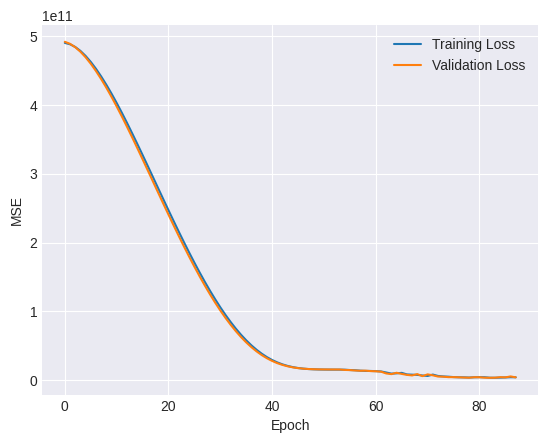

In [100]:
plt.plot(range(len(train_losses)), train_losses, label="Training Loss")
plt.plot(range(len(val_losses)), val_losses, label="Validation Loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [101]:
directory = 'models'
os.makedirs(directory, exist_ok=True)

torch.save(model.state_dict(), 'models/model.pt')

#내일 데이터 불러오기

In [102]:
import pandas as pd
import urllib
import urllib.request
import json

In [103]:
from datetime import date, timedelta
#오늘 날짜 불러오기
today = date.today()
formatted_today = today.strftime('%Y%m%d')
tomorrow = today + timedelta(days=1)
formatted_tomorrow = tomorrow.strftime('%Y%m%d')

In [104]:
servicekey = 's+fQ9LDUrt9xJ9LSIp0R4+gJBR7eOiUpRHNKXMb6gaV844FL4oI+OYVOY+MC2Bff+Iq9bQWFeWrktswAfBtkyg=='
url= 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst'

queryParams = '?' + urllib.parse.urlencode(
    {
        urllib.parse.quote_plus('servicekey') : servicekey,
        urllib.parse.quote_plus('pageNo') : '1',
        urllib.parse.quote_plus('numOfRows') : '372',  # 12 * 31 = 372
       # 아님 12개 항목임
        urllib.parse.quote_plus('dataType') : 'JSON', # JSON, XML 두가지 포멧을 제공합니다.
        urllib.parse.quote_plus('base_date') : formatted_today, # 예보 받을 날짜를 입력합니다. 최근 1일간의 자료만 제공합니다.
        urllib.parse.quote_plus('base_time') : '1700', # 예보 시간을 입력합니다. 2시부터 시작하여 3시간 단위로 입력 가능합니다.
        urllib.parse.quote_plus('nx') : '48', # 울산 태양광 발전소 x 좌표입니다. '기상청18_동네예보 조회서비스_오픈API활용가이드.zip'에 포함 된 excel파일을 통해 확인 가능합니다.
        urllib.parse.quote_plus('ny') : '36' # 울산 태양광 발전소 y 좌표입니다. '기상청18_동네예보 조회서비스_오픈API활용가이드.zip'에 포함 된 excel파일을 통해 확인 가능합니다.
    }
)

response = urllib.request.urlopen(url + queryParams).read()
response = json.loads(response)
print(response)

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'}, 'body': {'dataType': 'JSON', 'items': {'item': [{'baseDate': '20240218', 'baseTime': '1700', 'category': 'TMP', 'fcstDate': '20240218', 'fcstTime': '1800', 'fcstValue': '17', 'nx': 48, 'ny': 36}, {'baseDate': '20240218', 'baseTime': '1700', 'category': 'UUU', 'fcstDate': '20240218', 'fcstTime': '1800', 'fcstValue': '-2.4', 'nx': 48, 'ny': 36}, {'baseDate': '20240218', 'baseTime': '1700', 'category': 'VVV', 'fcstDate': '20240218', 'fcstTime': '1800', 'fcstValue': '7.8', 'nx': 48, 'ny': 36}, {'baseDate': '20240218', 'baseTime': '1700', 'category': 'VEC', 'fcstDate': '20240218', 'fcstTime': '1800', 'fcstValue': '162', 'nx': 48, 'ny': 36}, {'baseDate': '20240218', 'baseTime': '1700', 'category': 'WSD', 'fcstDate': '20240218', 'fcstTime': '1800', 'fcstValue': '8.2', 'nx': 48, 'ny': 36}, {'baseDate': '20240218', 'baseTime': '1700', 'category': 'SKY', 'fcstDate': '20240218', 'fcstTime': '1800', 'fcstValue': '4', 'nx'

In [105]:
import pandas as pd

# 새로운 데이터프레임을 생성
fcst_df = pd.DataFrame(columns=['Forecast_date', 'Forecast_hour', 'WindDirection', 'WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature'])

row_idx = 0  # row_idx 초기화

for data in response['response']['body']['items']['item']:
    fcst_df.loc[row_idx, 'Forecast_date'] = data['fcstDate']
    fcst_df.loc[row_idx, 'Forecast_hour'] = data['fcstTime']

    if data['category'] == 'REH':
        fcst_df.loc[row_idx, 'Humidity'] = float(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'PCP':
        fcst_df.loc[row_idx, 'Rainfall'] = str(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'TMP':
        fcst_df.loc[row_idx, 'Temperature'] = float(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'SKY':
        fcst_df.loc[row_idx, 'Cloud'] = float(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'VEC':
        fcst_df.loc[row_idx, 'WindDirection'] = float(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'WSD':
        fcst_df.loc[row_idx, 'WindSpeed'] = float(data.get('fcstValue', 'NaN'))
        row_idx += 1  # 다음 행으로 이동

In [106]:
# Forecast_date와 Forecast_hour 열을 datetime 형식으로 변환
fcst_df['Forecast_date'] = pd.to_datetime(fcst_df['Forecast_date'], format='%Y%m%d')
fcst_df['Forecast_hour'] = fcst_df['Forecast_hour'].astype(str).str.zfill(4)  # 시간을 4자리 문자열로 변환
fcst_df['Forecast_hour'] = fcst_df['Forecast_hour'].str[:2].astype(int)  # 앞의 2자리를 추출하여 정수로 변환

In [107]:
fcst_df = fcst_df.rename(columns={'Forecast_date': 'date', 'Forecast_hour': 'hour'})

# date가 '20240213'인 데이터만 추출하여 tomorrow_df에 저장
tomorrow_df = fcst_df[(fcst_df['date'] == formatted_tomorrow)].copy()

In [108]:
tomorrow_df.replace('강수없음', int('0'), inplace=True)

In [109]:
tomorrow_df

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature
6,2024-02-19,0,176.0,9.1,4.0,4.0mm,90.0,18.0
7,2024-02-19,1,178.0,9.3,4.0,4.0mm,90.0,18.0
8,2024-02-19,2,178.0,9.3,4.0,6.0mm,90.0,18.0
9,2024-02-19,3,184.0,9.2,4.0,6.0mm,90.0,18.0
10,2024-02-19,4,188.0,9.1,4.0,6.0mm,90.0,17.0
11,2024-02-19,5,185.0,8.7,4.0,3.0mm,90.0,17.0
12,2024-02-19,6,201.0,7.9,4.0,3.0mm,95.0,17.0
13,2024-02-19,7,208.0,7.3,4.0,3.0mm,95.0,17.0
14,2024-02-19,8,212.0,6.7,4.0,2.0mm,95.0,16.0
15,2024-02-19,9,207.0,5.9,4.0,2.0mm,100.0,16.0


In [110]:
# Rainfall 열 값 변경
rainfall_mapping = {'0': 0, '1mm 미만': 1, '1.0mm': 1, '2.0mm': 1, '3.0mm': 1}
tomorrow_df['Rainfall'] = tomorrow_df['Rainfall'].astype(str).map(rainfall_mapping).fillna(2).astype(int)

# Cloud 값 보정
cloud_mapping = {1: 2, 2: 4, 3: 8, 4: 10}
tomorrow_df['Cloud'] = tomorrow_df['Cloud'].map(cloud_mapping)

# hour 값 0~23 을 1~24로 수정
tomorrow_df['hour'] = tomorrow_df['hour'] + 1

tomorrow_df

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature
6,2024-02-19,1,176.0,9.1,10,2,90.0,18.0
7,2024-02-19,2,178.0,9.3,10,2,90.0,18.0
8,2024-02-19,3,178.0,9.3,10,2,90.0,18.0
9,2024-02-19,4,184.0,9.2,10,2,90.0,18.0
10,2024-02-19,5,188.0,9.1,10,2,90.0,17.0
11,2024-02-19,6,185.0,8.7,10,1,90.0,17.0
12,2024-02-19,7,201.0,7.9,10,1,95.0,17.0
13,2024-02-19,8,208.0,7.3,10,1,95.0,17.0
14,2024-02-19,9,212.0,6.7,10,1,95.0,16.0
15,2024-02-19,10,207.0,5.9,10,1,100.0,16.0


In [111]:
an = [1.000110,0.034221,0.000719]
bn = [0,0.001280,0.000077]
cn = [0.006918,-0.399912,-0.006758,-0.002697]
dn = [0,0.070257,0.000907,0.000148]


S = 1367 #solar constant
L = 33.3 #latitude
L_rad = np.deg2rad(L) #latitude를 rad으로 변환

tomorrow_df['date'] = pd.to_datetime(tomorrow_df['date'])
d = tomorrow_df['date'].dt.dayofyear
t = 2*np.pi*d/365

In [112]:
LN = datetime.datetime(2024, 2, 9, 12, 0, 0) # local noon time

In [113]:
# sun-earth distance  : r0 값을 알 수 없어서, a로 근사한 식을 이용함
r0_r2 = np.zeros(t.shape)
for i in range(0,3) :
    r0_r2 = r0_r2+an[i]*np.cos(i*t)+bn[i]*np.sin(i*t)

# declination angle
delta_rad = np.zeros(t.shape)
for i in range(0,4) :
    delta_rad = delta_rad+cn[i]*np.cos(i*t)+dn[i]*np.sin(i*t)

In [114]:
# Solar insolation for hour gap
# Q12는 태양 남중 12시로 가정한거고, Q13은 남중 13시로 가정한검니당
Q = np.zeros(t.shape)
gap = np.pi/12
tomorrow_df['Q12'] = S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos((tomorrow_df.hour-12)*gap)))
tomorrow_df['Q12'] = tomorrow_df['Q12'].apply(lambda x: max(0, x))
tomorrow_df['Q13'] = S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos((tomorrow_df.hour-13)*gap)))
tomorrow_df['Q13'] = tomorrow_df['Q13'].apply(lambda x: max(0, x))
tomorrow_df['Q_mean'] = (tomorrow_df['Q12']+tomorrow_df['Q13'])/2

In [115]:
# 'date' 열을 datetime 유형으로 변환
tomorrow_df['date'] = pd.to_datetime(tomorrow_df['date'])

# 'weekday' 열 추가
tomorrow_df['weekday'] = tomorrow_df['date'].dt.dayofweek

# one-hot encoding 적용
tomorrow_df = pd.get_dummies(tomorrow_df, columns=['weekday'], prefix='weekday')

# 모든 요일에 대한 열이 있는지 확인하고, 없는 경우 해당 열 추가
for i in range(7):  # 0부터 6까지 각 요일에 대해
    col_name = f'weekday_{i}'
    if col_name not in tomorrow_df.columns:
        tomorrow_df[col_name] = 0  # 없는 요일 열을 0으로 추가

# 열 순서 정렬을 위해 열 이름을 정렬
sorted_columns = sorted(tomorrow_df.columns)
tomorrow_df = tomorrow_df[sorted_columns]

tomorrow_df

,Cloud,Humidity,Q12,Q13,Q_mean,Rainfall,Temperature,WindDirection,WindSpeed,date,hour,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
6,10,90.0,0.000000,0.000000,0.000000,2,18.0,176.0,9.1,2024-02-19,1,1,0,0,0,0,0,0
7,10,90.0,0.000000,0.000000,0.000000,2,18.0,178.0,9.3,2024-02-19,2,1,0,0,0,0,0,0
8,10,90.0,0.000000,0.000000,0.000000,2,18.0,178.0,9.3,2024-02-19,3,1,0,0,0,0,0,0
9,10,90.0,0.000000,0.000000,0.000000,2,18.0,184.0,9.2,2024-02-19,4,1,0,0,0,0,0,0
10,10,90.0,0.000000,0.000000,0.000000,2,17.0,188.0,9.1,2024-02-19,5,1,0,0,0,0,0,0
11,10,90.0,0.000000,0.000000,0.000000,1,17.0,185.0,8.7,2024-02-19,6,1,0,0,0,0,0,0
12,10,95.0,146.215644,0.000000,73.107822,1,17.0,201.0,7.9,2024-02-19,7,1,0,0,0,0,0,0
13,10,95.0,422.011767,146.215644,284.113706,1,17.0,208.0,7.3,2024-02-19,8,1,0,0,0,0,0,0
14,10,95.0,658.843268,422.011767,540.427517,1,16.0,212.0,6.7,2024-02-19,9,1,0,0,0,0,0,0
15,10,100.0,840.570469,658.843268,749.706868,1,16.0,207.0,5.9,2024-02-19,10,1,0,0,0,0,0,0


In [116]:
# columns_to_scale 정의
columns_to_scale = ['WindDirection', 'WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature', 'Q12', 'Q13', 'Q_mean', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']

# test 세트에도 동일한 scaling 적용
tomorrow_df[columns_to_scale] = ss.transform(tomorrow_df[columns_to_scale])

In [117]:
tomorrow_df.describe()

,Cloud,Humidity,Q12,Q13,Q_mean,Rainfall,Temperature,WindDirection,WindSpeed,hour,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01
mean,1.085849,1.543015,-0.139709,-0.139648,-0.141469,2.373948,-0.293177,0.398446,1.749412,12.500000,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-4.078672e-01
std,0.000000,0.193892,0.879613,0.879654,0.877739,2.391527,0.332864,0.816238,0.991238,7.071068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.670508e-17
min,1.085849,1.314095,-0.808036,-0.808006,-0.818378,-0.243563,-1.006994,-1.591704,0.196200,1.000000,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-4.078672e-01
25%,1.085849,1.314095,-0.808036,-0.808006,-0.818378,-0.243563,-0.429865,0.039021,0.874459,6.750000,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-4.078672e-01
50%,1.085849,1.657475,-0.808036,-0.808006,-0.734009,2.897451,-0.217239,0.311917,1.661238,12.500000,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-4.078672e-01
75%,1.085849,1.657475,0.693347,0.693447,0.549730,2.897451,-0.034987,0.926490,2.583670,18.250000,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-4.078672e-01
max,1.085849,2.000854,1.456591,1.456727,1.430364,6.038464,0.086513,1.576561,3.234798,24.000000,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-4.078672e-01


In [118]:
testdata = tomorrow_df.drop(['date', 'WindDirection', 'WindSpeed', 'Q12', 'Q_mean'], axis=1)

In [119]:
# Load the model

model.load_state_dict( torch.load('models/model.pt') )
model.to(device)

LSTMwithAttn(
  (lstm): LSTM(13, 64, num_layers=2, batch_first=True)
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-1): 2 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=64, out_features=64, bias=True)
            (key): Linear(in_features=64, out_features=64, bias=True)
            (value): Linear(in_features=64, out_features=64, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=64, out_features=64, bias=True)
            (LayerNorm): LayerNorm((64,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=64, out_features=64, bias=True)
          (intermediate_act_fn): GELUActivation()
        )
        (output): BertOutput(
          (dense): Linear(in_features

In [120]:
testdata

,Cloud,Humidity,Q13,Rainfall,Temperature,hour,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
6,1.085849,1.314095,-0.808006,6.038464,0.086513,1,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867
7,1.085849,1.314095,-0.808006,6.038464,0.086513,2,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867
8,1.085849,1.314095,-0.808006,6.038464,0.086513,3,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867
9,1.085849,1.314095,-0.808006,6.038464,0.086513,4,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867
10,1.085849,1.314095,-0.808006,6.038464,-0.034987,5,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867
11,1.085849,1.314095,-0.808006,2.897451,-0.034987,6,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867
12,1.085849,1.657475,-0.808006,2.897451,-0.034987,7,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867
13,1.085849,1.657475,-0.474792,2.897451,-0.034987,8,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867
14,1.085849,1.657475,0.153726,2.897451,-0.156488,9,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867
15,1.085849,2.000854,0.693447,2.897451,-0.156488,10,2.454073,-0.407677,-0.407677,-0.407772,-0.410152,-0.409105,-0.407867


In [121]:
features_test = testdata
labels_test = pd.DataFrame({'label': [0] * len(testdata)})
test_dataset = ElecDemandDataset(features_test, labels_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [122]:
# get number of rows in testdata
num_test = len(features_test)
num_test

24

In [123]:
next(iter(test_loader))[0].shape

torch.Size([1, 2, 13])

In [124]:
y_pred = [[] for _ in range(num_test)]
len(y_pred)

24

In [125]:
# test phase
model.eval()

with torch.no_grad():
    for i, (features, labels) in enumerate(test_loader):
        features = features.to(device)
        labels = labels.to(device)

        outputs = model(features).squeeze(-1)
        outputs[outputs < 3] = 0

        for seq_idx in range(outputs.shape[-1]):
            y_pred[i + seq_idx].append(outputs[:,seq_idx].item())

In [126]:
y_pred = [sum(y_pred[i]) / len(y_pred[i]) for i in range(len(y_pred))]

In [127]:
y_pred

[605168.875,
 617591.25,
 640082.625,
 622254.9375,
 612251.4375,
 601637.625,
 618367.625,
 748273.46875,
 654301.1875,
 588811.875,
 584127.3125,
 583167.84375,
 574289.875,
 565748.15625,
 565739.53125,
 572661.03125,
 561877.625,
 559046.96875,
 553486.71875,
 549203.4375,
 547266.03125,
 548248.5625,
 546418.6875,
 547462.0]

In [128]:
y_pred_pd = pd.DataFrame(y_pred)
y_pred_pd.to_csv('solar.csv', index=False)

<ipython-input-134-b46e200d403a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


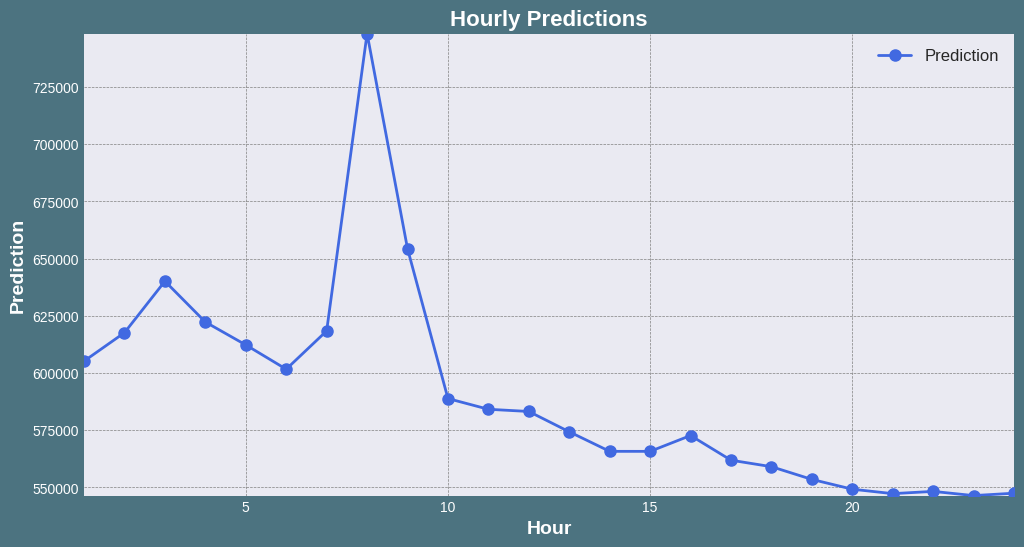

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# 스타일 설정
plt.style.use('seaborn-darkgrid')

# 그래프 그리기
plt.figure(figsize=(12, 6), facecolor='#4c7380')
plt.plot(range(1, 25), y_pred_pd[0], marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8, label='Prediction')

# 레이블, 제목, 범례 추가
plt.xlabel('Hour', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Prediction', fontsize=14, fontweight='bold', color='white')
plt.title('Hourly Predictions', fontsize=16, fontweight='bold', color='white')
plt.legend(loc='best', fontsize=12, facecolor='#4c7380')

# 그리드 추가
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

# 축 범위 조정
plt.xlim(1, 24)
plt.ylim(min(y_pred_pd[0]) - 0.05, max(y_pred_pd[0]) + 0.05)

# 축 눈금 레이블 색상 변경
plt.xticks(color='white')
plt.yticks(color='white')

# 파일 저장 및 표시
plt.savefig('Enhanced_Tomorrow_Solar_Energy(hourly).png', facecolor='#4c7380')
plt.show()
